In [2]:
import pandas as pd
import numpy as np
import talib
from datetime import datetime
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import statsmodels.api as sm
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

/home/VENV36/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


<div class="jumbotron">
    <p class="display-1 h1">量化交易模型</p>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

# 量化交易系统

- 交易策略

<center><img src="./img/models/tradingSystem0.png" width=50%></center>

- 量化交易系统由**量化交易模型**驱动

<center><img src="./img/models/tradingSystem1.png" width=50%></center>

<center><img src="./img/models/tradingSystem2.png" width=60%></center>

<center><img src="./img/models/tradingSystem3.png" width=100%></center>

- 数据模型
    - 数据的获取、存储、处理等

- Alpha模型
    - 决定入场、离场的时机

- 风险控制模型
    - 控制损失

- 交易成本模型
    - 估计交易成本（交易手续费等）与收益

- 投资组合模型
    - 决定希望持有的品种与头寸规模

- 交易执行模型
    - 有效率、低成本的执行买卖交易指令

# 数据模型

> 数据是量化交易模型的基础

## 数据类型

<center><img src="./img/models/dataType.png" width=100%></center>

## 数据的获取

### 从第三方终端获取数据

- 典型平台
    - Wind数据库
    - [TuShare https://tushare.pro/](https://tushare.pro/)
        - 注册获得token
    - [JointQuant https://www.joinquant.com/](https://www.joinquant.com/)
        - 注册获得一年的免费使用权限

- 优缺点：
    - 优点：数据经过加工处理
    - 缺点：速度慢、数据精细度不足，例如掘金量化只提供最近3个月的tick数据

### 从交易所获取数据

- 典型接口
    - 交易接口CTP（Comprehensive Transaction Platform）[http://www.sfit.com.cn/](http://www.sfit.com.cn/)
    - 基于CTP的`Python`量化框架：[vn.py https://www.vnpy.com/](https://www.vnpy.com/)

- 优缺点：
    - 优点：速度快、原始数据
    - 缺点：需要自己学习接口使用，清理数据

#### 行情数据

<center><img src="./img/models/marketdata.png" width=100%></center>

#### Tick数据

- 完整记录了市场每一次交易或增加新订单的数据，记录市场上每个事件

序号|报价|数量|方向
---|---|---|---
S1|1750|1|空

序号|报价|数量|方向
---|---|---|---
S2|1752|1|空
S1|1750|1|空

序号|报价|数量|方向
---|---|---|---
S2|1752|1|空
S1|1750|1|空
B1|1748|1|多

<center><img src="./img/models/tickdata.png" width=100%></center>

<dl class="row">
    <dt class="col-md-3">快照数据（snapshot）</dt>
    <dd class="col-md-9">对tick数据按照一定频率进行切片后的统计数据，即一个时间截面的统计数据</dd>
</dl>

- 国内期货：500ms一个切片
- 国内股票：3秒一个切片

#### 市场深度

<dl class="row">
    <dt class="col-md-3">Depth of Market</dt>
    <dd class="col-md-9">在每个价格上下的<font color="red">限价买单</font>与<font color="red">限价卖单</font>的手数分布</dd>
</dl>

<center><img src="./img/models/depthOfMarket.png" width=80%></center>

- 最优卖价：所有卖价报价中的最小值

- 最优买价：所有买价报价中的最大值

#### Level 1 v.s. Level 2数据

- Level 1数据是基本行情数据

- Level 2数据=Level 1数据+深度行情数据

##### 股票

行情|交易所|数据类型|交易所实时推送频率|行情深度
:---:|:---:|:---:|:---:|:---:
Level1|上交所、深交所|快照数据|3秒1次|五档
Level2|上交所、深交所|快照数据（逐笔成交队列、委托队列）|3秒1次|十档

##### 期货

行情|交易所|数据类型|交易所实时推送频率|行情深度
:---:|:---:|:---:|:---:|:---:
Level1|中金所|快照数据|1秒2次|一档
Level1|上期所|快照数据|1秒2次|一档
Level1|大商所|快照数据|1秒2次|一档
Level1|郑商所|快照数据|1秒4次|一档
Level2|中金所|快照数据|1秒2次|五档
Level2|上期所|快照数据|1秒2次|五档
Level2|大商所|快照数据|1秒4次|五档
Level2|郑商所|快照数据|1秒4次|五档

## 数据的存储

- 数据库存储
- 本地文件存储

### 数据库存储

#### 关系型数据库

- MySQL
    - `Python`相应的包：`PyMySQL`
    - 安装 `pip install PyMySQL`

- PostgreSQL
    - 官网：[http://www.postgres.cn/](http://www.postgres.cn/)
    - `Python`相应的包：`psycopg2`
    - 安装`pip install psycopg2`

#### 非关系型数据库（NoSQL, Not only SQL）

- 非结构化数据占比急剧增大

<center><img src="./img/models/structured-data-vs-unstructured-data.png" width=80%></center>

##### NoSQL优势

- 数据存储灵活

<center><img src="./img/models/wide_column_database.png" width=100%></center>

<center><img src="./img/models/document.jpg" width=40%></center>

- 数据存储、读取效率高

- MongoDB
    - 官网：[https://www.mongodb.org.cn/](https://www.mongodb.org.cn/)
        - 社区版免费
    - `Python`相应的包：`pymongo`
    - 安装：`pip install pymongo`

#### 时序数据库

- `InfluxDB` [https://www.influxdata.com/products/influxdb-overview/](https://www.influxdata.com/products/influxdb-overview/)
    - 单机版免费
- `TimescaleDB` [https://www.timescale.com/products](https://www.timescale.com/products)

- 优势
    - 专门针对时间序列数据优化
    - 每秒能够写入、读取千万、上亿条数据

1000万条数据|`MySQL`|`InfluxDB`
---|---|---
存储|7 `min+`|2 `min+`
读取|6 `s+`|0.22 `s+`

### 本地文本文件

#### `csv`文件

```python
pd.read_csv('path_to_file.csv', encoding=None)
```
- `'path_to_file.csv`：要打开的`.csv`文件的完整路径，字符串
- `encoding`：读取的文件编码，字符串，常用`utf_8, utf_8_sig, gb2312, gbk, gb18030`
- 返回`DataFrame`对象

```python
df.to_csv('path_to_file.csv', index=True)
```
- `'path_to_file.csv'`：保存的以`.csv`结尾的文件的完整路径
- `index`：是否把行索引写入到`.csv`文件中，默认是写入

- 不足
    - 单张表存储的数据规模受限
        - 1048576行，16384列
    - 内存消耗大

#### `hdf5`文件

- Hierarchical Data Format，一种跨平台的数据存储文件
- 一般以`.h5`或者`.hdf5`作为文件的后缀名
- 写入、读取速度快，压缩后文件体积小

##### `hdf5`文件结构

- 数据以类似于文件夹的形式组织，包括`group`和`dataset`两种对象类型
- 每一种对象还可以增加**元数据**（`metadata`），描述该对象的额外信息

<center><img src="./img/models/hdf5_structure.jpg" width=80%></center>

- `hdf5`相对于`csv`的优势

1亿行，5列数据|`csv`|`hdf5`
---|---|---
存储速度|775 `s+`|16 `s+`
存储体积|900 `M+`|400 `M+`（未启用压缩）
读取速度|104 `s+`|8 `s+`


##### `hdf5`文件的读取

```python
pip install tables
import pandas as pd
pd.read_hdf(path, key=None, mode='r', where=None, start=None, stop=None)
```
- `path`：需要读取的`hdf5`文件的完整路径
- `key`：组（group）的名称标识
- `mode`：读取方式，可以取值：`r`只读，`r+`读写，`a`追加写入
- `where`：读取的条件，`str`类型
- `start`：读取的起始行数，`int`类型
- `end`：读取的结束行数，`int`类型
- 返回`dataframe`数据类型

In [2]:
with pd.HDFStore('./data/models/2019-12-06_08-54.h5') as h5store:
    h5store.groups()

[/ActionDay (Group) ''
   children := ['table' (Table)],
 /TradingDay (Group) ''
   children := ['table' (Table)],
 /options/CF003C11600 (Group) ''
   children := ['meta' (Group), 'table' (Table)],
 /options/CF003C11800 (Group) ''
   children := ['meta' (Group), 'table' (Table)],
 /options/CF003C12000 (Group) ''
   children := ['meta' (Group), 'table' (Table)],
 /options/CF003C12200 (Group) ''
   children := ['meta' (Group), 'table' (Table)],
 /options/CF003C12400 (Group) ''
   children := ['meta' (Group), 'table' (Table)],
 /options/CF003C12600 (Group) ''
   children := ['meta' (Group), 'table' (Table)],
 /options/CF003C12800 (Group) ''
   children := ['meta' (Group), 'table' (Table)],
 /options/CF003C13000 (Group) ''
   children := ['meta' (Group), 'table' (Table)],
 /options/CF003C13200 (Group) ''
   children := ['meta' (Group), 'table' (Table)],
 /options/CF003C13400 (Group) ''
   children := ['meta' (Group), 'table' (Table)],
 /options/CF003C13600 (Group) ''
   children := ['meta'

In [4]:
# 读取Tick数据
tickdf = pd.read_hdf('./data/models/2019-12-06_08-54.h5',key='futures/rb2001',mode='r+')
tickdf.head()
tickdf.shape

,LastPrice,Volume,Turnover,OpenInterest,UpdateTime,UpdateMillisec,BidPrice1,BidVolume1,AskPrice1,AskVolume1
0,3586.0,358344,1.284419e+10,1710176.0,09:00:00,500,3588.0,3,3589.0,71
1,3588.0,358394,1.284598e+10,1710174.0,09:00:01,0,3587.0,36,3588.0,8
2,3588.0,358458,1.284828e+10,1710174.0,09:00:01,500,3588.0,30,3589.0,67
3,3589.0,358628,1.285438e+10,1710130.0,09:00:02,0,3588.0,9,3589.0,115
4,3589.0,358736,1.285826e+10,1710198.0,09:00:02,500,3588.0,9,3589.0,104


(15787, 10)

In [8]:
# 筛选读取，并列条件
tickdffil = pd.read_hdf('./data/models/2019-12-06_08-54.h5',key='futures/rb2001',mode='r+',where='(UpdateTime>"10:15:00")&(UpdateTime<="11:00:00")')
tickdffil

,LastPrice,Volume,Turnover,OpenInterest,UpdateTime,UpdateMillisec,BidPrice1,BidVolume1,AskPrice1,AskVolume1
8913,3612.0,652198,2.343467e+10,1662114.0,10:30:00,500,3612.0,262,3613.0,57
8914,3612.0,652206,2.343496e+10,1662106.0,10:30:01,0,3612.0,340,3613.0,57
8915,3613.0,652246,2.343640e+10,1662106.0,10:30:01,500,3612.0,339,3613.0,44
8916,3612.0,652280,2.343763e+10,1662092.0,10:30:02,0,3612.0,368,3613.0,50
8917,3613.0,652322,2.343915e+10,1662096.0,10:30:02,500,3612.0,402,3613.0,43
...,...,...,...,...,...,...,...,...,...,...
12437,3608.0,736072,2.646419e+10,1655614.0,10:59:58,500,3607.0,152,3608.0,251
12438,3607.0,736078,2.646440e+10,1655608.0,10:59:59,0,3607.0,159,3608.0,251
12439,3607.0,736078,2.646440e+10,1655608.0,10:59:59,500,3607.0,159,3608.0,251
12440,3608.0,736080,2.646447e+10,1655606.0,11:00:00,0,3607.0,159,3608.0,250


In [9]:
# 筛选读取，或条件
tickdffil1 = pd.read_hdf('./data/models/2019-12-06_08-54.h5',key='futures/rb2001',mode='r+',where='(UpdateTime=="10:15:00")|(UpdateTime=="11:00:00")')
tickdffil1

,LastPrice,Volume,Turnover,OpenInterest,UpdateTime,UpdateMillisec,BidPrice1,BidVolume1,AskPrice1,AskVolume1
8911,3612.0,652046,2.342918e+10,1662136.0,10:15:00,0,3612.0,274,3613.0,19
8912,3612.0,652046,2.342918e+10,1662136.0,10:15:00,500,3612.0,274,3613.0,19
12440,3608.0,736080,2.646447e+10,1655606.0,11:00:00,0,3607.0,159,3608.0,250
12441,3608.0,736180,2.646808e+10,1655598.0,11:00:00,500,3607.0,152,3608.0,235


##### `hdf5`文件的存储

```python
DataFrame.to_hdf(path, key, mode='a', complevel=None, append=False, format=None,data_columns=None)
```
- `path`：以`.h5`为后缀存储文件的完整路径
- `key`：`group`的名称
- `complevel`：压缩等级，`int`类型，取值为$0\sim 9$，数字越大，压缩程度越高
- `append`：是否允许在现有的文件中追加内容
- `format`：数据存储的格式，`str`类型，可以是`fixed`或者`table`
    - `fixed`：读取/存储速度快，但是不允许`append`
    - `table`：允许`append`以及在读取的时候筛选
- `data_columns`：`list`类型，要存储的列的名称；或者`True`，存储所有的列。**如果希望能够用在读取的时候筛选，必须设置该参数**

In [43]:
tickdf.to_hdf('./data/models/rb2001.h5',key='rb',mode='w',complevel=9)

In [44]:
res = pd.read_hdf('./data/models/rb2001.h5',key='rb',mode='r',where='UpdateTime=="10:30:00"')
res

TypeError: cannot pass a where specification when reading from a Fixed format store. this store must be selected in its entirety

In [45]:
tickdf.to_hdf('./data/models/rb2001_tab.h5',key='rb',mode='w',complevel=9,append=True,format='table',data_columns=True)

In [47]:
resTab = pd.read_hdf('./data/models/rb2001_tab.h5',key='rb',mode='r',where='UpdateTime=="10:31:00"')
resTab

,LastPrice,Volume,Turnover,OpenInterest,UpdateTime,UpdateMillisec,BidPrice1,BidVolume1,AskPrice1,AskVolume1
9031,3609.0,655688,2.356070e+10,1661692.0,10:31:00,0,3609.0,60,3610.0,438
9032,3609.0,655688,2.356070e+10,1661692.0,10:31:00,500,3609.0,76,3610.0,446


## 数据处理

- 噪声数据，即无意义的或错误的数据，既浪费存储空间，更严重的是导致错误的分析结果

### 缺失数据

#### 检查是否含有缺失值

- 在Python中用`NaN`（Not a Number）表示缺失值

In [10]:
rbDat = pd.read_csv('./data/models/rbNan.csv',index_col=0)
rbDat.head()
rbDat.shape

,Close,High,Low
ActionDay,,,
20160104,1775.0,1806.0,1773.0
20160105,1779.0,NaN,1761.0
20160106,1783.0,1786.0,1766.0
20160107,NaN,1786.0,1747.0
20160108,1752.0,1775.0,NaN


(1150, 3)

- 对于`pandas`的`DataFrame`结构，检验是否含有缺失值的方法
    - `DataFrame.isna()`

In [11]:
rbDat.isna()

,Close,High,Low
ActionDay,,,
20160104,False,False,False
20160105,False,True,False
20160106,False,False,False
20160107,True,False,False
20160108,False,False,True
...,...,...,...
20200826,False,False,False
20200827,False,False,False
20200828,False,False,False


- 显示含有缺失值的行

In [12]:
rbDat.loc[rbDat.isna().any(axis=1),:]

,Close,High,Low
ActionDay,,,
20160105,1779.0,NaN,1761.0
20160107,NaN,1786.0,1747.0
20160108,1752.0,1775.0,NaN
20160513,NaN,2064.0,2001.0
20161013,2354.0,NaN,2331.0
20170314,3597.0,3624.0,NaN
20170919,NaN,NaN,NaN
20180702,NaN,3807.0,3737.0
20190920,3392.0,NaN,3378.0


```python
    DataFrame.any(axis=0)
```
- 数据框的行或列是否含有`True`，若含有`True`则返回值为`True`，否则，返回值为`False`
- `axis`：0表示按行，1表示案列

#### 删除缺失值

- `DataFrame`删除缺失值的方法
    - `DataFrame.dropna(axis=0, how='any', inplace=False)`
        - `axis`：取值为0，删除含有缺失值的行；取值为1，删除含有缺失值的列
        - `how`：取值为`any`，只要含有缺失值，就删除相应的行或列；取值为`all`，只有行或列的所有元素都是缺失值，才会删除该行或列
        - `inplace`：是否更新原始的`DataFrame`

In [13]:
rbRem = rbDat.dropna(how='all')
rbRem.shape

(1149, 3)

#### 填充缺失值

- `DataFrame`填充缺失值方法
```python
DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None)
```
    + `value`：用于填充缺失值的**标量值**或**字典对象**
        * 标量值：所有缺失值均填相同的数值
        * 字典对象：按**列**填充不同的缺失值
    + `method`：填充方式
        * `pad`或`ffill`：前向替换，用缺失值的前一个有效值替换该缺失值
        * `backfill`或`bfill`：后向替换，用缺失值的后一个有效值替换该缺失值
    + `limit`：前向或者后向填充的最大连续缺失值的数量

In [14]:
rbFill = rbDat.fillna(method='ffill')
rbFill

,Close,High,Low
ActionDay,,,
20160104,1775.0,1806.0,1773.0
20160105,1779.0,1806.0,1761.0
20160106,1783.0,1786.0,1766.0
20160107,1783.0,1786.0,1747.0
20160108,1752.0,1775.0,1747.0
...,...,...,...
20200826,3787.0,3793.0,3771.0
20200827,3768.0,3796.0,3761.0
20200828,3787.0,3789.0,3766.0


### 奇点数据

- 奇点指价格异常、突然的波动

- 可以通过剔除，或者平滑（移动平均）的方法消除

### 期货合约换月

- 由于近、远月合约的价格存在**升贴水**，造成在换月当日价格出现**不连续的缺口**

In [5]:
rbdf = pd.read_csv('./data/models/rbChangeContractNew.csv',index_col=0,parse_dates=[0])
# index_col=0, 指定第0列作为生成的DataFrame的行标签
# parse_dates=[0]，将第0列转换为时间格式
rbdf

,Open,High,Low,Close,Contract
Date,,,,,
2020-02-03 08:59:00,3233,3233,3233,3233,rb2005
2020-02-03 09:00:00,3233,3233,3233,3233,rb2005
2020-02-03 09:01:00,3233,3233,3233,3233,rb2005
2020-02-03 09:02:00,3233,3253,3233,3252,rb2005
2020-02-03 09:03:00,3253,3270,3246,3270,rb2005
...,...,...,...,...,...
2020-09-01 14:10:00,3805,3808,3805,3806,rb2009
2020-09-01 14:11:00,3806,3807,3806,3807,rb2009
2020-09-01 14:12:00,3807,3807,3806,3806,rb2009


- 2020-03-25 14:15:00换月，从rb2005换到rb2009

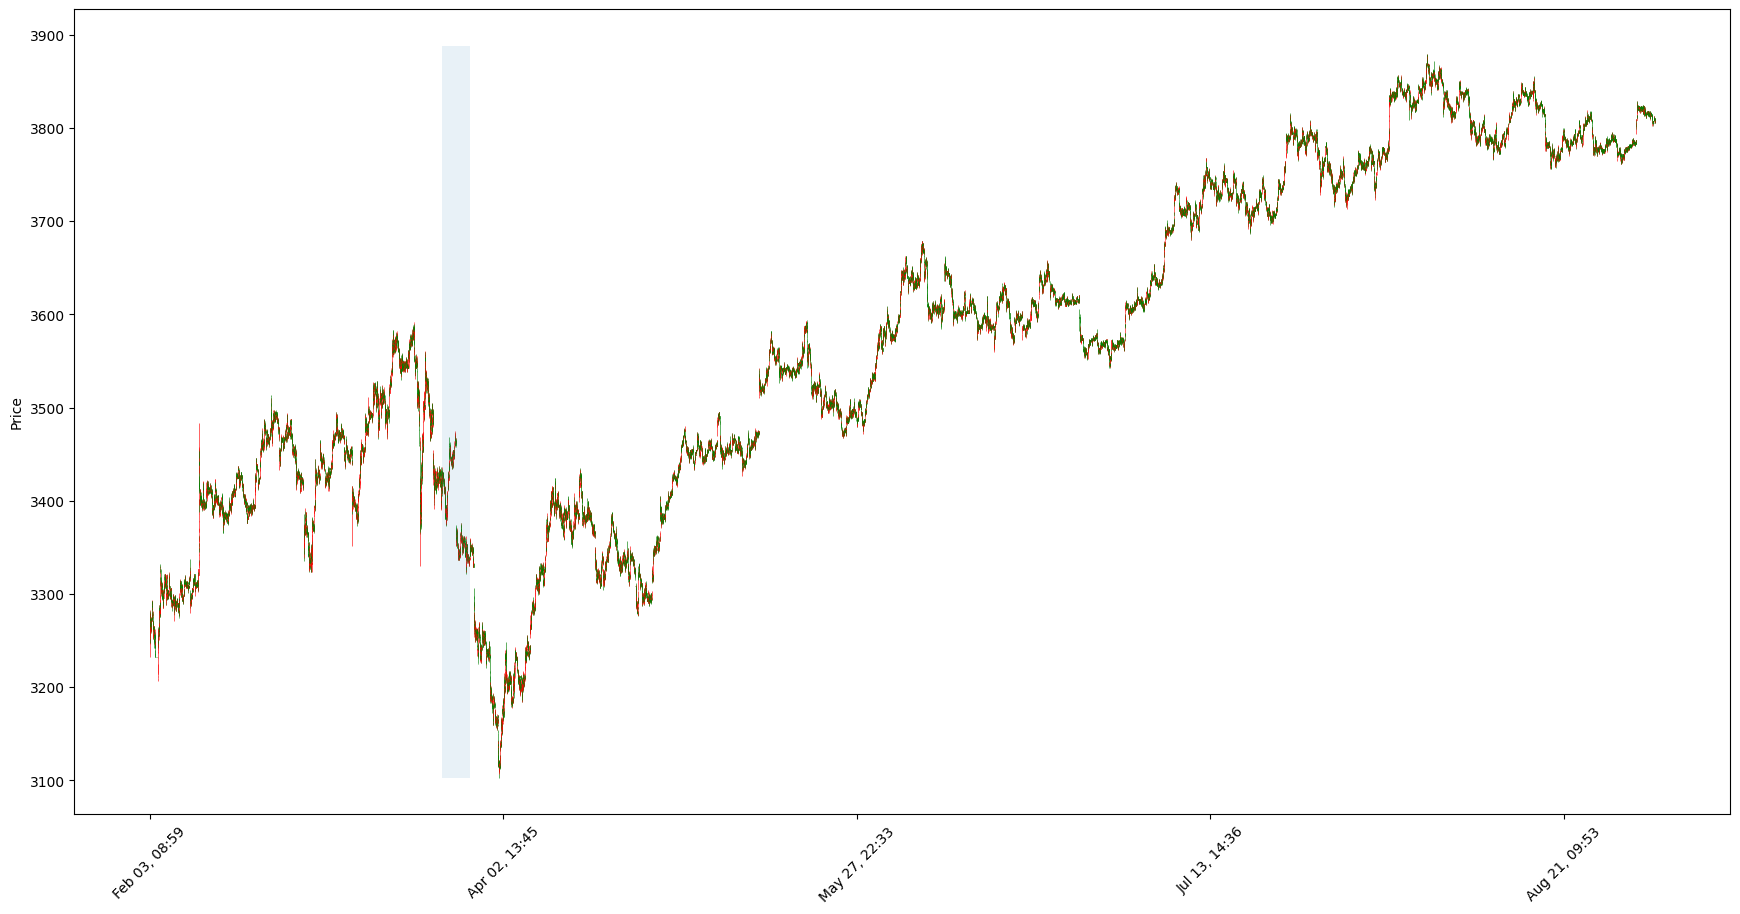

In [21]:
mc = mpf.make_marketcolors(up='red',down='green',inherit=True)
sc = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(rbdf,type='candle',style=sc,figratio=(18,9),figscale=2,vlines=dict(vlines="2020-03-25 14:14:00",linewidths=20,alpha=0.1))

#### 调整方法

In [184]:
rbdf.loc[(rbdf.index=="2020-03-25 14:14:00") | (rbdf.index=="2020-03-25 14:15:00"),:]

,Open,High,Low,Close
Date,,,,
2020-03-25 14:14:00,3461.0,3461.0,3458.0,3459.0
2020-03-25 14:15:00,3374.0,3374.0,3369.0,3370.0


- 以第一个历史合约的价格为基准，计算新合约相对于上一个合约的价格升贴水

In [185]:
rbdfAdj = rbdf.copy()
rbdfAdj.loc[rbdf.index>="2020-03-25 14:15:00",'Open'] += 89
rbdfAdj.loc[rbdf.index>="2020-03-25 14:15:00",'High'] += 89
rbdfAdj.loc[rbdf.index>="2020-03-25 14:15:00",'Low'] += 89
rbdfAdj.loc[rbdf.index>="2020-03-25 14:15:00",'Close'] += 89

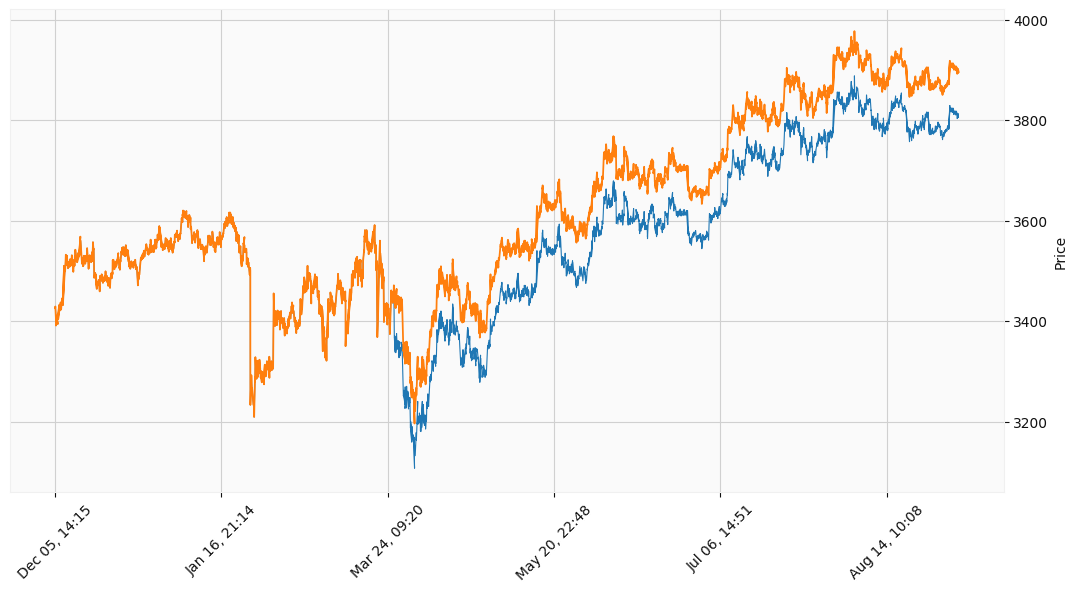

In [187]:
adj = mpf.make_addplot(rbdfAdj['Close'])
mpf.plot(rbdf,type='line',style='yahoo',addplot=adj,figratio=(12,6),figscale=1.2)

- 以最新合约的价格为基准，计算前一个合约相对于后一个合约价格的升贴水

In [188]:
rbdfAdj1 = rbdf.copy()
rbdfAdj1.loc[rbdf.index<="2020-03-25 14:14:00",'Open'] -= 89
rbdfAdj1.loc[rbdf.index<="2020-03-25 14:14:00",'High'] -= 89
rbdfAdj1.loc[rbdf.index<="2020-03-25 14:14:00",'Low'] -= 89
rbdfAdj1.loc[rbdf.index<="2020-03-25 14:14:00",'Close'] -= 89

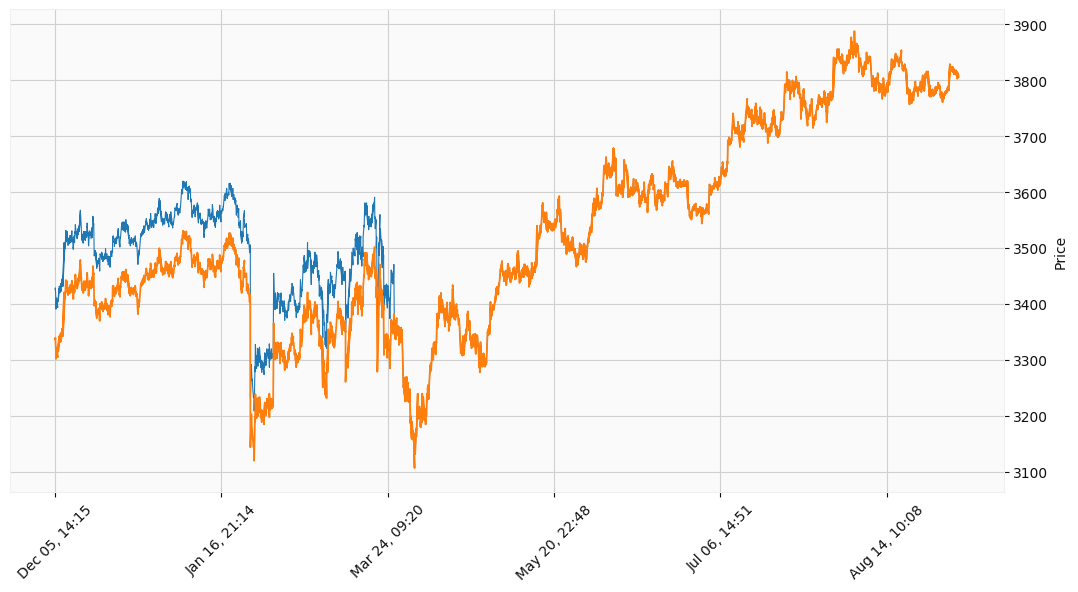

In [190]:
adj1 = mpf.make_addplot(rbdfAdj1['Close'])
mpf.plot(rbdf,type='line',style='yahoo',addplot=adj1,figratio=(12,6),figscale=1.2)

### 股票价格复权

- 股票的复权价格：考虑到市场收盘后可能对股票价格产生影响的因素而将股价调整后的价格

- 影响因素：派发现金股利和股票股利

#### 前复权

- 以**除权后**第一天的价格点为基础，把**除权以前**的数据进行复权

#### 后复权

- 以**除权前**最后一天的价格点为基础，把**除权后**的数据进行复权

# Alpha模型

- Alpha意味着获取**超额收益**

<center><img src="./img/models/alphaModels.png" width=100%></center>

## 趋势追踪模型

- 在趋势初期入场，在趋势末期离场

- 技术指标是识别趋势的重要方法

### 技术指标的概念

> 基于价格、成交量、持仓量等的历史数据而构建的启发式或数学计算指标


- [https://www.visualcapitalist.com/12-types-technical-indicators-stocks/](https://www.visualcapitalist.com/12-types-technical-indicators-stocks/)
- [https://www.theforexchronicles.com/the-4-different-types-of-technical-indicators-that-you-can-use/](https://www.theforexchronicles.com/the-4-different-types-of-technical-indicators-that-you-can-use/)

### 技术指标的分类

- 根据技术指标的具体内容
    - 趋势指标
    - 能量指标
    - 波动性指标
    - 交易量指标

#### 趋势指标（trend indicators）

- 通过将标的资产的价格与基准比较（通常是均值），判断趋势的方向与强度
    - 价格超过均值，上升趋势
    - 价格跌破均值，下跌趋势

- 包括
    - 简单移动平均
    - 指数移动平均
    - MACD
    - 。。。

##### 简单移动平均（simple moving average, SMA)

$$SMA_t(n)=\frac{1}{n}\sum_{i=0}^{n-1}p_{t-i}$$

- 其中, $p_t$是$t$时刻的价格，$n$可以取3分钟、5分钟、15分钟，60分钟等。

- TA-Lib金融软件包是目前最常用的技术指标函数库，包括150多个技术指标

- 安装TA-Lib，

```python
pip install talib-binary
```
- 使用TA-Lib包的方法，

``` python
import talib
```

In [108]:
rbdf = pd.read_csv('./data/models/rbChangeContract.csv')
rbdf.shape
rbdf.head()

(243, 5)

,ActionDay,open,close,high,low
0,20190902,3384,3397,3415,3383
1,20190903,3396,3410,3414,3380
2,20190904,3411,3445,3452,3404
3,20190905,3448,3413,3474,3413
4,20190906,3416,3433,3462,3384


In [109]:
rbdf['ActionDay'] = pd.to_datetime(rbdf['ActionDay'],format='%Y%m%d')
rbdf.set_index('ActionDay',inplace=True)
rbdf.head()

,open,close,high,low
ActionDay,,,,
2019-09-02,3384,3397,3415,3383
2019-09-03,3396,3410,3414,3380
2019-09-04,3411,3445,3452,3404
2019-09-05,3448,3413,3474,3413
2019-09-06,3416,3433,3462,3384


In [111]:
rSMA = talib.SMA(rbdf['close'], timeperiod=30)
rSMA

ActionDay
2019-09-02            NaN
2019-09-03            NaN
2019-09-04            NaN
2019-09-05            NaN
2019-09-06            NaN
                 ...     
2020-08-26    3788.600000
2020-08-27    3790.666667
2020-08-28    3792.400000
2020-08-31    3795.733333
2020-09-01    3795.200000
Length: 243, dtype: float64

In [112]:
rbdf['SMA']=rSMA
rbdf

,open,close,high,low,SMA
ActionDay,,,,,
2019-09-02,3384,3397,3415,3383,NaN
2019-09-03,3396,3410,3414,3380,NaN
2019-09-04,3411,3445,3452,3404,NaN
2019-09-05,3448,3413,3474,3413,NaN
2019-09-06,3416,3433,3462,3384,NaN
...,...,...,...,...,...
2020-08-26,3778,3787,3793,3771,3788.600000
2020-08-27,3790,3768,3796,3761,3790.666667
2020-08-28,3768,3787,3789,3766,3792.400000


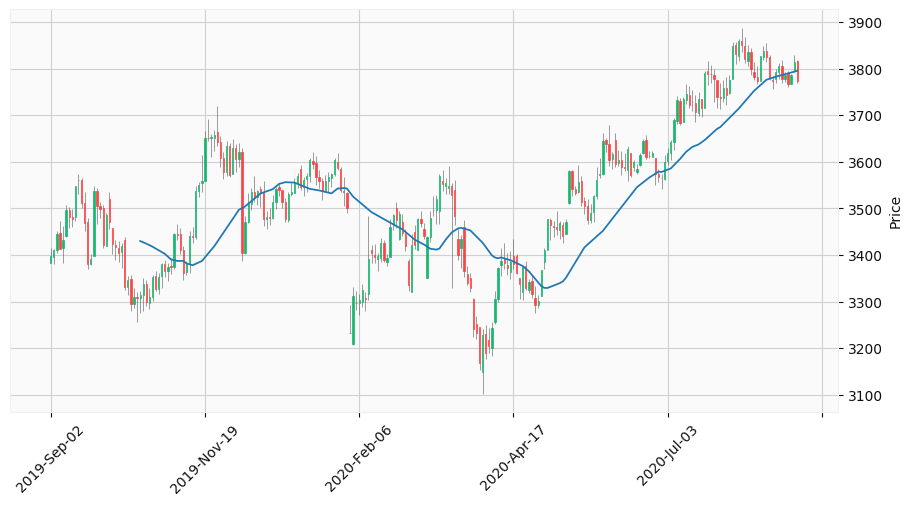

In [120]:
smaFig = mpf.make_addplot(rbdf['SMA'])
mpf.plot(rbdf,type='candle',style='yahoo',addplot=smaFig,figratio=(12,6),figscale=1)

##### 指数移动平均（exponential moving average, EMA）

$$EMA_t(\alpha)=\alpha EMA_{t-1}+(1-\alpha)p_t$$

- 其中，$\alpha\in(0,1)$，$p_t$为$t$时刻价格

In [113]:
rEMA = talib.EMA(rbdf['close'], timeperiod=30)
rbdf['EMA'] = rEMA
rbdf.head()

,open,close,high,low,SMA,EMA
ActionDay,,,,,,
2019-09-02,3384,3397,3415,3383,NaN,NaN
2019-09-03,3396,3410,3414,3380,NaN,NaN
2019-09-04,3411,3445,3452,3404,NaN,NaN
2019-09-05,3448,3413,3474,3413,NaN,NaN
2019-09-06,3416,3433,3462,3384,NaN,NaN


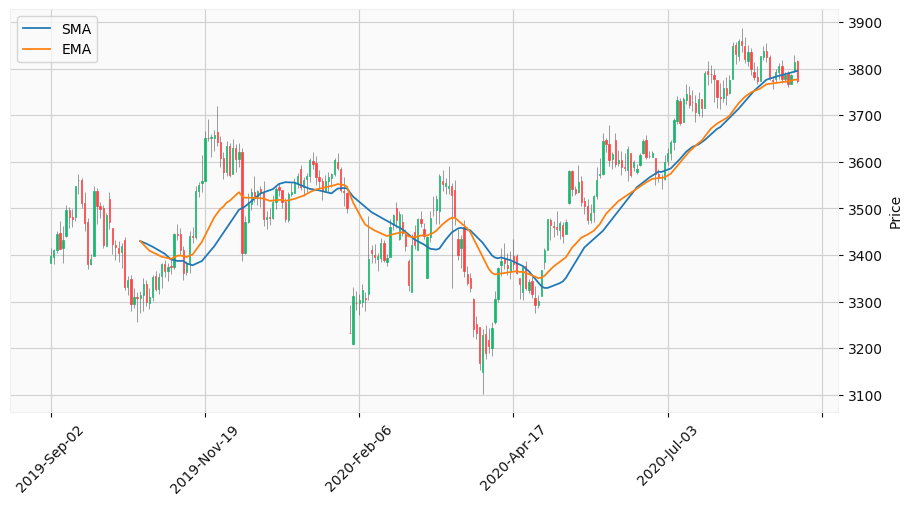

In [129]:
mvFig = [mpf.make_addplot(rbdf['SMA']),
          mpf.make_addplot(rbdf['EMA'])]
fig,ax = mpf.plot(rbdf,type='candle',style='yahoo',addplot=mvFig,figratio=(12,6),figscale=1, returnfig=True)
ax[0].legend(['SMA','EMA'],loc='upper left')

##### EMA与SMA比较

- EMA给最新价格和历史价格不同的权重，而SMA同等对待每个价格

- EMA利用所有历史价格信息，只是随着时间推移，历史价格信息的影响在逐渐减少，而SMA只用到了时间窗口内的价格信息

##### MACD（Moving Average Convergence and Divergence)

- MACD称为异同移动平均线，由双指数移动平均线构成。
- 利用收盘价的短期（常用为12日）指数移动平均线与长期（常用为26日）指数移动平均线之间的聚合与分离状况，对买进、卖出时机作出研判。

- **MACD线**： $12\text{-day 价格EMA} - 26\text{-day 价格EMA}$
- **信号线**： $9\text{-day MACD线的EMA}$

- **MACD 柱状图**： $\text{MACD线} - \text{Signal线}$

In [114]:
macd, macdsignal, macdhist = talib.MACD(rbdf['close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [115]:
rbdf['macd'] = macd
rbdf['macdsignal'] = macdsignal
rbdf['macdhist'] = macdhist
rbdf

,open,close,high,low,SMA,EMA,macd,macdsignal,macdhist
ActionDay,,,,,,,,,
2019-09-02,3384,3397,3415,3383,NaN,NaN,NaN,NaN,NaN
2019-09-03,3396,3410,3414,3380,NaN,NaN,NaN,NaN,NaN
2019-09-04,3411,3445,3452,3404,NaN,NaN,NaN,NaN,NaN
2019-09-05,3448,3413,3474,3413,NaN,NaN,NaN,NaN,NaN
2019-09-06,3416,3433,3462,3384,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-26,3778,3787,3793,3771,3788.600000,3773.118321,14.611429,23.862973,-9.251545
2020-08-27,3790,3768,3796,3761,3790.666667,3772.788106,11.358499,21.362079,-10.003579
2020-08-28,3768,3787,3789,3766,3792.400000,3773.705003,10.196136,19.128890,-8.932754


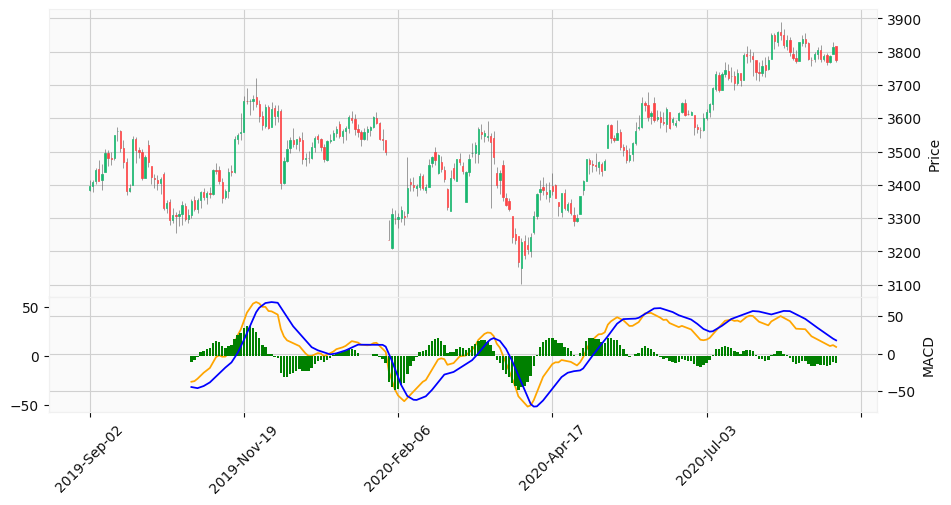

In [139]:
macdFig = [mpf.make_addplot(rbdf['macd'],panel=1,color='orange',ylabel='MACD'),
          mpf.make_addplot(rbdf['macdsignal'],panel=1,color='blue'),
          mpf.make_addplot(rbdf['macdhist'],type='bar',color='green',panel=1)]
mpf.plot(rbdf,type='candle',style='yahoo',addplot=macdFig,figratio=(12,6),figscale=1)

- 当**MACD线**向上穿越**信号线**，做多信号
- 当**MADC线**向下穿越**信号线**，做空信号

#### 能量指标（momentum indicators）

- 通过衡量价格上涨或下跌的变化幅度
- 帮助判别趋势的强度

##### 相对强度指数（relative strength index, RSI）

- 计算一段时间内价格向上波动占价格绝对波动的比例

```python
if close(t) > close(t-1):
    up = close(t)-close(t-1)
    dn = 0
else:
    up = 0
    dn = close(t-1)-close(t)
# close(t)是t时刻的收盘价
```

\begin{align}
  upavg = \frac{upavg\times(t-1)+up}{t} \\
  dnavg = \frac{dnavg\times(t-1)+dn}{t} \\
  RSI = \frac{upavg}{upavg+dnavg}\times100
\end{align}
- 其中，$upavg$是价格上涨幅度的均值，$dnavg$价格下跌幅度的均值

- 波动范围是$[0,100]$

In [116]:
rRSI = talib.RSI(rbdf['close'], timeperiod=14)
rbdf['RSI'] = rRSI
rbdf

,open,close,high,low,SMA,EMA,macd,macdsignal,macdhist,RSI
ActionDay,,,,,,,,,,
2019-09-02,3384,3397,3415,3383,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-03,3396,3410,3414,3380,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-04,3411,3445,3452,3404,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-05,3448,3413,3474,3413,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-06,3416,3433,3462,3384,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-08-26,3778,3787,3793,3771,3788.600000,3773.118321,14.611429,23.862973,-9.251545,51.407384
2020-08-27,3790,3768,3796,3761,3790.666667,3772.788106,11.358499,21.362079,-10.003579,48.257699
2020-08-28,3768,3787,3789,3766,3792.400000,3773.705003,10.196136,19.128890,-8.932754,51.460442


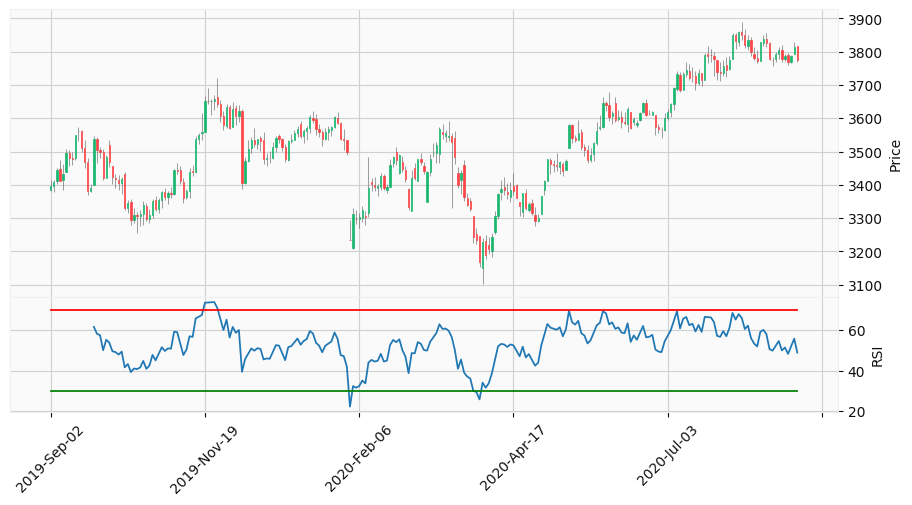

In [144]:
line70 = np.ones(rbdf.shape[0])*70
line30 = np.ones(rbdf.shape[0])*30
rsiFig = [mpf.make_addplot(rbdf['RSI'],panel=1,ylabel='RSI'),
          mpf.make_addplot(line70,panel=1,color='red',secondary_y=False),
          mpf.make_addplot(line30,panel=1,color='green',secondary_y=False),         
         ]
mpf.plot(rbdf,type='candle',style='yahoo',addplot=rsiFig,figratio=(12,6),figscale=1)

- $\text{RSI}>70$：超买(overbought)，标的的**交易价格**<font color="red">超过</font>其**内在价值**(intrinsic value)或市场价值，意味着价格近期将会调整
- $\text{RSI}<30$：超卖(oversold)，标的**交易价格**<font color="green">低于</font>其**内在价值**或市场价值，意味着价格近期将会调整

- 在上升区间，RSI应当稳定在30以上，并且经常触碰70
- 在下跌区间，RSI应当几乎不超过70，并且经常触碰30

##### 商品通道指数（commodity channel index）

- 用来识别趋势的开始点与结束点

$$
\text{CCI}=\frac{\text{TP}-\text{ATP}}{0.015\times\text{MD}}
$$

- $\text{TP}=\frac{high_n+low_n+close}{3}$：典型价格（typical price）
- $high_n$：$n$个周期内的最高价
- $low_n$：$n$个周期内的最低价
- $\text{ATP}$：典型价格的简单移动平均
- $MD=\frac{\sum_n|\text{TP}-\text{ATP}|}{n}$：典型价格平均离差

In [146]:
rCCI = talib.CCI(rbdf['high'], rbdf['low'], rbdf['close'], timeperiod=14)

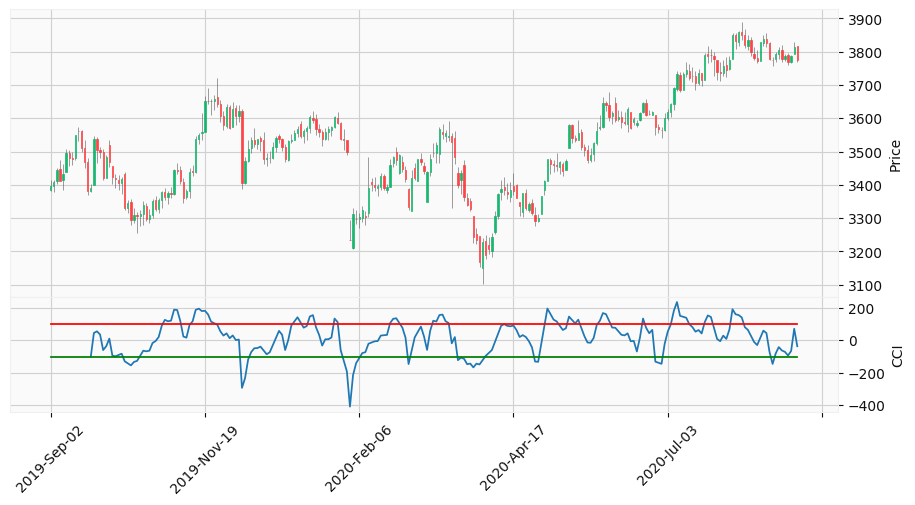

In [148]:
line100 = np.ones(rbdf.shape[0])*100
linen100 = np.ones(rbdf.shape[0])*(-100)
cciFig = [mpf.make_addplot(rCCI,panel=1,ylabel='CCI'),
          mpf.make_addplot(line100,panel=1,color='red',secondary_y=False),
          mpf.make_addplot(linen100,panel=1,color='green',secondary_y=False),         
         ]
mpf.plot(rbdf,type='candle',style='yahoo',addplot=cciFig,figratio=(12,6),figscale=1)

- 当CCI由负值超过100，意味着出现上升趋势
- 当CCI由正值跌破-100，意味着出现下跌趋势

#### 波动性指标（volatility indicators）

- 衡量价格波动程度

##### 平均真实变动范围（average true range）

In [149]:
rATR = talib.ATR(rbdf['high'], rbdf['low'], rbdf['close'], timeperiod=14)
rATR

ActionDay
2019-09-02          NaN
2019-09-03          NaN
2019-09-04          NaN
2019-09-05          NaN
2019-09-06          NaN
                ...    
2020-08-26    44.539477
2020-08-27    43.858085
2020-08-28    42.368222
2020-08-31    42.341921
2020-09-01    42.817498
Length: 243, dtype: float64

##### 布林带（Bollinger Bands）

> 价格在移动均线上下附近增加了波动性的带状图形。其中波动性的计算是基于不断变化的标准差

- 中线（Middle Band） = 20天移动平均
- 上线（Upper Band） = 中线 + 2倍20天价格标准差
- 下线（Lower Band） = 中线 - 2倍20天价格标准差

In [150]:
upperband, middleband, lowerband = talib.BBANDS(rbdf['close'], timeperiod=5, nbdevup=2, nbdevdn=2, matype=0)

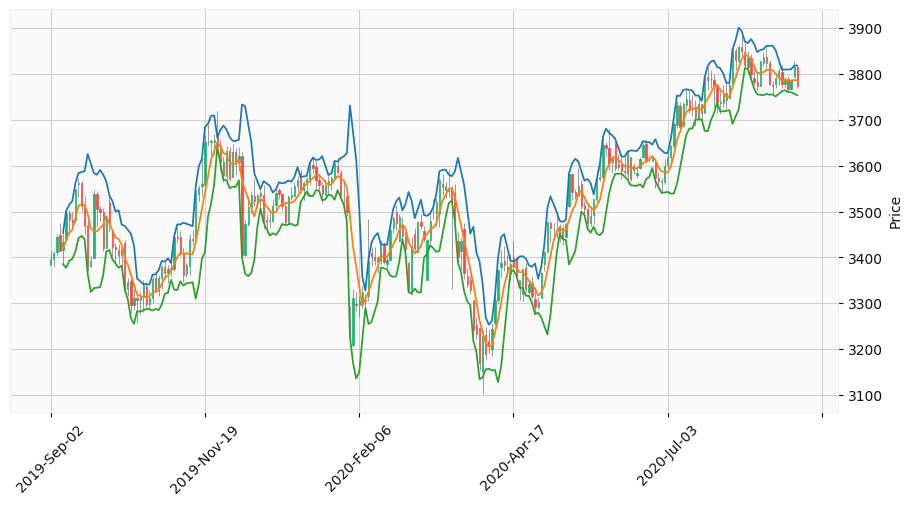

In [152]:
bbandsFig = [mpf.make_addplot(upperband),
          mpf.make_addplot(middleband),
          mpf.make_addplot(lowerband),         
         ]
mpf.plot(rbdf,type='candle',style='yahoo',addplot=bbandsFig,figratio=(12,6),figscale=1)

- 如果价格波动性增加，布林带就会变宽；相反，价格波动性降低，布林带就会收缩

- 在价格上升阶段，价格会在**中线**和**上线**之间波动
    - 一旦价格跌破中线，有可能开始下跌
    - 下线即为下跌的目标价位

- 在价格下跌阶段，价格会在**中线**和**下线**之间波动
    - 一旦价格突破中线，有可能开始上涨
    - 上线即为上涨的目标价位

#### 交易量指标（volume indicators）

- 利用交易量衡量价格趋势的强度，以及对价格方向的确认

##### On-balance volume (OBV)

- 做多与做空成交量的累计和

```python
if close(t)>close(t-1):
    OBV(t) = OBV(t-1) + volume
elif close(t)<close(t-1):
    OBV(t) = OBV(t-1) - volume
else:
    OBV(t) = OBV(t-1)
```

In [197]:
rbdaily = pd.read_csv('./data/tradingBasics/rb2010.csv')
rbdaily['Date'] = pd.to_datetime(rbdaily['Date'],format='%Y-%m-%d %H:%M')
rbdaily.set_index('Date',inplace=True)
rbdaily.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-07 09:01:00,3849.0,3860.0,3849.0,3859.0,16100
2020-08-07 09:02:00,3858.0,3861.0,3857.0,3857.0,4654
2020-08-07 09:03:00,3858.0,3861.0,3857.0,3859.0,6055
2020-08-07 09:04:00,3860.0,3861.0,3857.0,3858.0,3773
2020-08-07 09:05:00,3858.0,3859.0,3857.0,3857.0,1718


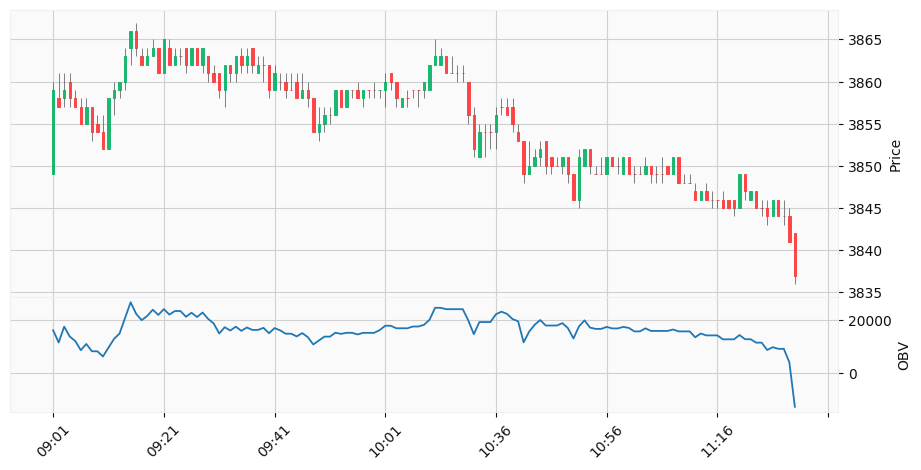

In [201]:
rOBV = talib.OBV(rbdaily['Close'], rbdaily['Volume'])
obvFig = mpf.make_addplot(rOBV,panel=1,ylabel='OBV')
mpf.plot(rbdaily,type='candle',style='yahoo',addplot=obvFig,figratio=(12,6),figscale=1)

- OBV显示出一系列上升的尖峰，表明较强的上涨趋势
- OBV显示出一系列下跌的谷底，表明较强的下跌趋势

##### Chaikin oscillator

- Accumulation/Distribution Line （ADL）：类似于OBV，只是累加或减去的是$\text{当期成交量}\times \text{收盘价位置指数}$
- 收盘价位置指数（close location value, CLV)的计算方法为

$$\text{CLV} = \frac{(\text{close}-\text{low})-(\text{high}-\text{close})}{\text{high}-\text{low}}$$
- Chaikin oscillator：ADL的$n$周期移动平均$-$ADL的$m$周期移动平均

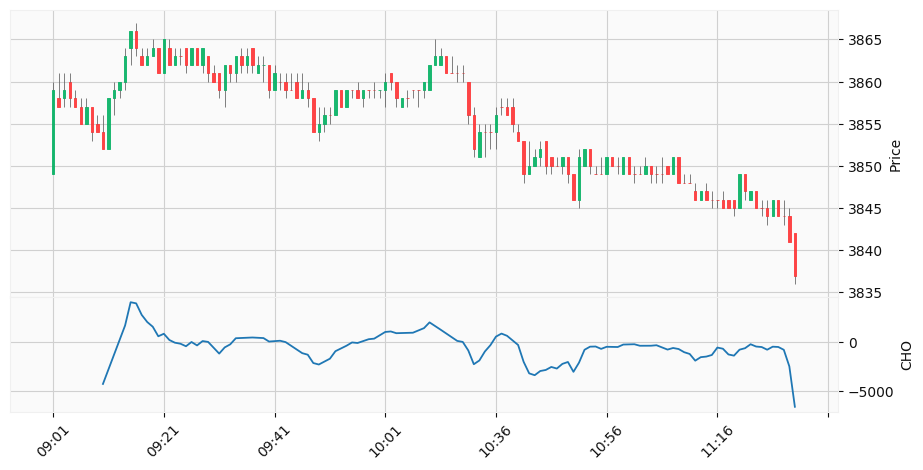

In [204]:
rCHO = talib.ADOSC(rbdaily['High'], rbdaily['Low'], rbdaily['Close'], rbdaily['Volume'], fastperiod=3, slowperiod=10)
choFig = mpf.mak  e_addplot(rCHO,panel=1,ylabel='CHO')
mpf.plot(rbdaily,type='candle',style='yahoo',addplot=choFig,figratio=(12,6),figscale=1)

- 当Chaikin oscillator为正值，表明买方压力积聚，意味着上涨趋势
- 当Chaikin oscillator为负值，表明卖方压力积聚，意味着下跌趋势

- ta-lib 下载
    - [https://www.lfd.uci.edu/~gohlke/pythonlibs/](https://www.lfd.uci.edu/~gohlke/pythonlibs/)
- 安装
    - `pip install D:/TA_Lib‑0.4.18‑cp38‑cp38‑win_amd64.whl`

## 均值回归模型

- 理论基础
    > 标的资产的价格总是围绕着其内在价值波动，一旦趋势结束，价格必然出现反方向运动，回到价值附近

- 常用的实现方式
    > 配对交易（套利）

- 原因
    - 单一资产的内在价值较难确定
    - 对于两个高度相关资产，一种资产的价格就可以近似成为另一种资产的内在价值

<div class="row">
    <div class="col-md-6">
        <img src="./img/models/trend.jpg" width=90%>
    </div>
    <div class="col-md-6">
        <img src="./img/models/arbitrage.jpg" width=90%>
    </div>
</div>

##### `Python`实现

```python
pip install statsmodels
import statsmodels.api as sm
coint_t, pvalue, crit_value = sm.tsa.stattools.coint(y0, y1)
```
- `y0`与`y1`：需要检验的两个价格序列
- `coint_t`：对回归残差单位根检验的`t`统计量
- `pvalue`：单位根检验的显著性水平
- `crit_value`：单位根检验分别在1%、5%、10%上的临界值

In [258]:
retAapl = web.DataReader('AAPL',start=datetime(2018,1,1),end=(datetime(2020,9,23)),data_source='stooq')
retAapl.head()
retGoog = web.DataReader('GOOG',start=datetime(2018,1,1),end=(datetime(2020,9,23)),data_source='stooq')
retGoog.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-22,112.68,112.86,109.16,111.81,183055373
2020-09-21,104.54,110.19,103.10,110.08,195713815
2020-09-18,110.40,110.88,106.09,106.84,287104882
2020-09-17,109.72,112.20,108.71,110.34,178010968
2020-09-16,115.23,116.00,112.04,112.13,155026675


,Open,High,Low,Close,Volume
Date,,,,,
2020-09-22,1450.09,1469.5200,1434.5300,1465.46,1583201
2020-09-21,1440.06,1448.3600,1406.5500,1431.16,2888827
2020-09-18,1498.01,1503.0032,1437.1300,1459.99,3103882
2020-09-17,1496.00,1508.2984,1470.0001,1495.53,1879751
2020-09-16,1555.54,1562.0000,1519.8200,1520.90,1312299


In [259]:
retAapl.sort_index(inplace=True)
retAapl.head()
retGoog.sort_index(inplace=True)
retGoog.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,41.008,41.522,40.790,41.512,105892200
2018-01-03,41.578,42.062,41.438,41.505,122271476
2018-01-04,41.580,41.808,41.468,41.702,92736404
2018-01-05,41.800,42.265,41.708,42.172,97913124
2018-01-08,42.018,42.322,41.918,42.028,85190420


,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,1048.34,1066.94,1045.23,1064.90,1236401
2018-01-03,1064.31,1086.29,1063.21,1082.48,1429883
2018-01-04,1088.00,1093.57,1084.00,1086.40,1003740
2018-01-05,1094.00,1104.25,1092.00,1102.23,1278921
2018-01-08,1102.23,1111.27,1101.62,1106.94,1046769


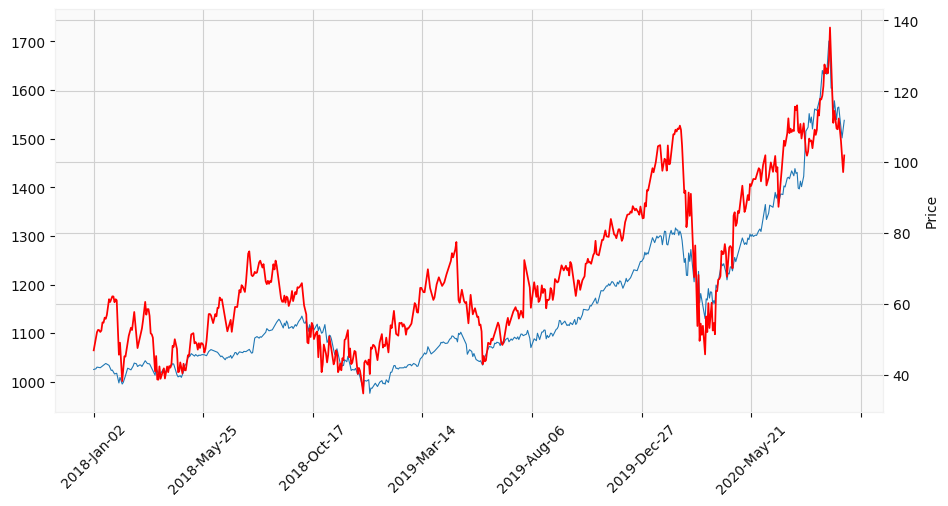

In [269]:
subfig = mpf.make_addplot(retGoog['Close'],color='red')
mpf.plot(retAapl,type='line',style='yahoo',addplot=subfig,figratio=(12,6),figscale=1)

In [270]:
res = sm.tsa.stattools.coint(np.log(retAapl['Close']), np.log(retGoog['Close']))
print(f't_val {res[0]}, p_val {res[1]}, crit_val {res[2]}')

t_val -3.465079997579618, p_val 0.03561907897134225, crit_val [-3.91249963 -3.3450644  -3.05064733]


## 多因子模型

<dl class="row">
    <dt class="col-md-4">多因子模型</dt>
    <dd class="col-md-8">利用<strong>多个</strong>对资产价格（例如，股票价格、期货价格等）走势有显著且有效的因子建立的量化模型，以解释和预测均衡资产价格</dd>
</dl>

<dl class="row">
    <dt class="col-md-4">因子（factor）</dt>
    <dd class="col-md-8">一个现象产生后，对于下周期收益率有影响</dd>
</dl>

### CAPM模型

\begin{equation}
  E(r_i)=r_f+\beta_i\left(E(r_m)-r_f\right)
\end{equation}

- $\beta_i$：风险系数
- $E(r_i)$：第$i$个资产的期望价格（收益）
- $r_f$：无风险收益
- $E(r_m)$：市场组合的期望收益

- 假设
    1. 所有投资者都希望获得最大收益
    2. 所有投资者在投资期内的预期收益服从**相同**的概率分布
    3. 所有投资者对风险都具有**相同**的偏好和估计
    4. 所有投资者都使用风险化收益模型进行投资
    5. 投资者都具有**风险相同的情况下偏好高收益**，**收益相同的情况下偏好低风险**的投资风格

> 假设过于严格，尤其2-5与实际情况不符

### APT模型

- APT(Arbitrage Pricing Theory)套利定价理论

\begin{equation}
  E(r_i)=r_f+\beta_{i1}\times RP_1+\beta_{i2}\times RP_2+\cdots+\beta_{in}\times RP_n
\end{equation}

- $\beta_{ij}$：资产$i$对第$j$个因素的敏感度
- $RP_j$：影响资产价格（收益）的第$j$个因子

- 相对于CAPM模型，APT模型
    - 不需要假设所有投资者对市场的预期一致
    - 没有假设市场是完全有效的，存在价格扭曲

- APT模型的局限
    - 不知道有多少个因子
    - 不知道哪些因子能够对资产价格（收益）产生显著影响

### Fama-French三因子模型

\begin{equation}
  E(r_i)=r_f+\beta_1\left(E(r_m)-r_f\right)+\beta_2E(SMB)+\beta_3E(HML)
\end{equation}

#### $SMB$

- Small Minus Big，市值因子

- 小市值（market captilization）公司的股票回报会超过大市值公司的股票回报

#### $HML$

- High Minus Low，账面市值比

- 高账面市值比（价值股）公司的股票回报会超过低账面市值比（成长股）公司的股票回报

### 因子的分类

#### 股票交易相关因子

##### 价值因子

- 对应价值型投资，买入便宜的资产长期持有以获得超额收益

- 典型指标
    - 盈利收益率，$E/P$
    - 市净率

##### 成长因子

- 对应成长型投资，依据资产的历史增长水平对未来预测

- 典型指标
    - 净资产收益率（ROE）
    - 总资产收益率（ROA）
    - 主营收入增长率
    - 市盈率相对盈利增长比例，$PEG=\frac{PE}{年盈利增长率}$

##### 品质因子

- 持有高品质的资产，风险较低，较好保护投资者利益

- 典型指标
    - 资产负债率
    - 固定资产比例

#### 期货交易相关因子

<center><img src="./img/models/futureMultiFactors.png" width=100%></center>

- 近月收益：近月合约价格对数的增量，衡量捕捉当前价格波动的收益
- 持有收益：远月合约价格对数的增量，衡量捕捉长期持有的收益

##### 动量因子（momentum factor）

- 原理：过去上涨良好的商品未来还会上涨；过去下跌的商品未来还会下跌

- 因子构成
    - 商品的超额收益在过去12个月内的均值

##### 期限结构因子（term structure）

- 原理：存储理论（the theory of storage），该理论将期限结构与库存水平以及持有实物商品的的成本与收益联系起来

- 持有稀缺的商品，卖出供应充足的商品

- 因子构成
    $$ln(f_{t,Front})-ln(f_{t,Second})$$
    
    - 其中，$ln(f_{t,Front})为准备建立仓位时候的近月合约价格$

##### 波动率因子（volatility factor）

- 原理：价格波动性高的商品对外来的冲击更为敏感，但同时，也对跨期风险的承受能力弱，因此，持有这类商品的投资者会要求一个更高的回报

- 因子构成：变异系数
\begin{align}
  &\frac{\sigma^2}{|\mu|}\\
  &\sigma^2=\frac{1}{D-1}\sum_{d=1}^D(r_{d,Front}-\mu)^2\\
  &\mu = \frac{1}{D}\sum_{d=1}^Dr_{d,Front}
\end{align}

##### 价值因子（value factor）

- 原理：投资者的有限理性偏差导致价格出现异动，但是之后价格会向平均水平回归

- 长期盈利的商品在未来价格会下跌；长期低迷的商品在未来价格会上涨

- 因子构成

\begin{equation}
  ln\frac{\frac{1}{D}\sum_{d=1}^D f_{d,Front}}{f_{t,Front}}
\end{equation}

##### 流动性因子（liquidity factor）

- 原理：持有流动性低的商品的投资者要求一个更高的期望回报

- 因子构成
\begin{equation}
  LR=\frac{1}{D}\sum_{d=1}^D\frac{Volume_d}{|r_d|}
\end{equation}

##### 汇率因子

- 原理：美元币值与商品价格呈现负相关关系

- 因子构成
    - $期货的月收益=\beta\times 美元对主要货币的汇率变动+\varepsilon$

- 对于美元$\beta$系数更小的商品，投资者会要求一个更高的回报

##### 通胀因子

- 原理：商品是对通胀的对冲

- 因子构成
    - $期货的月收益=\beta\times 通胀率的变动+\varepsilon$

- 对于通胀$\beta$系数更大的商品，投资者会要求一个更高的回报